Visualization 1: Topic Word Clouds


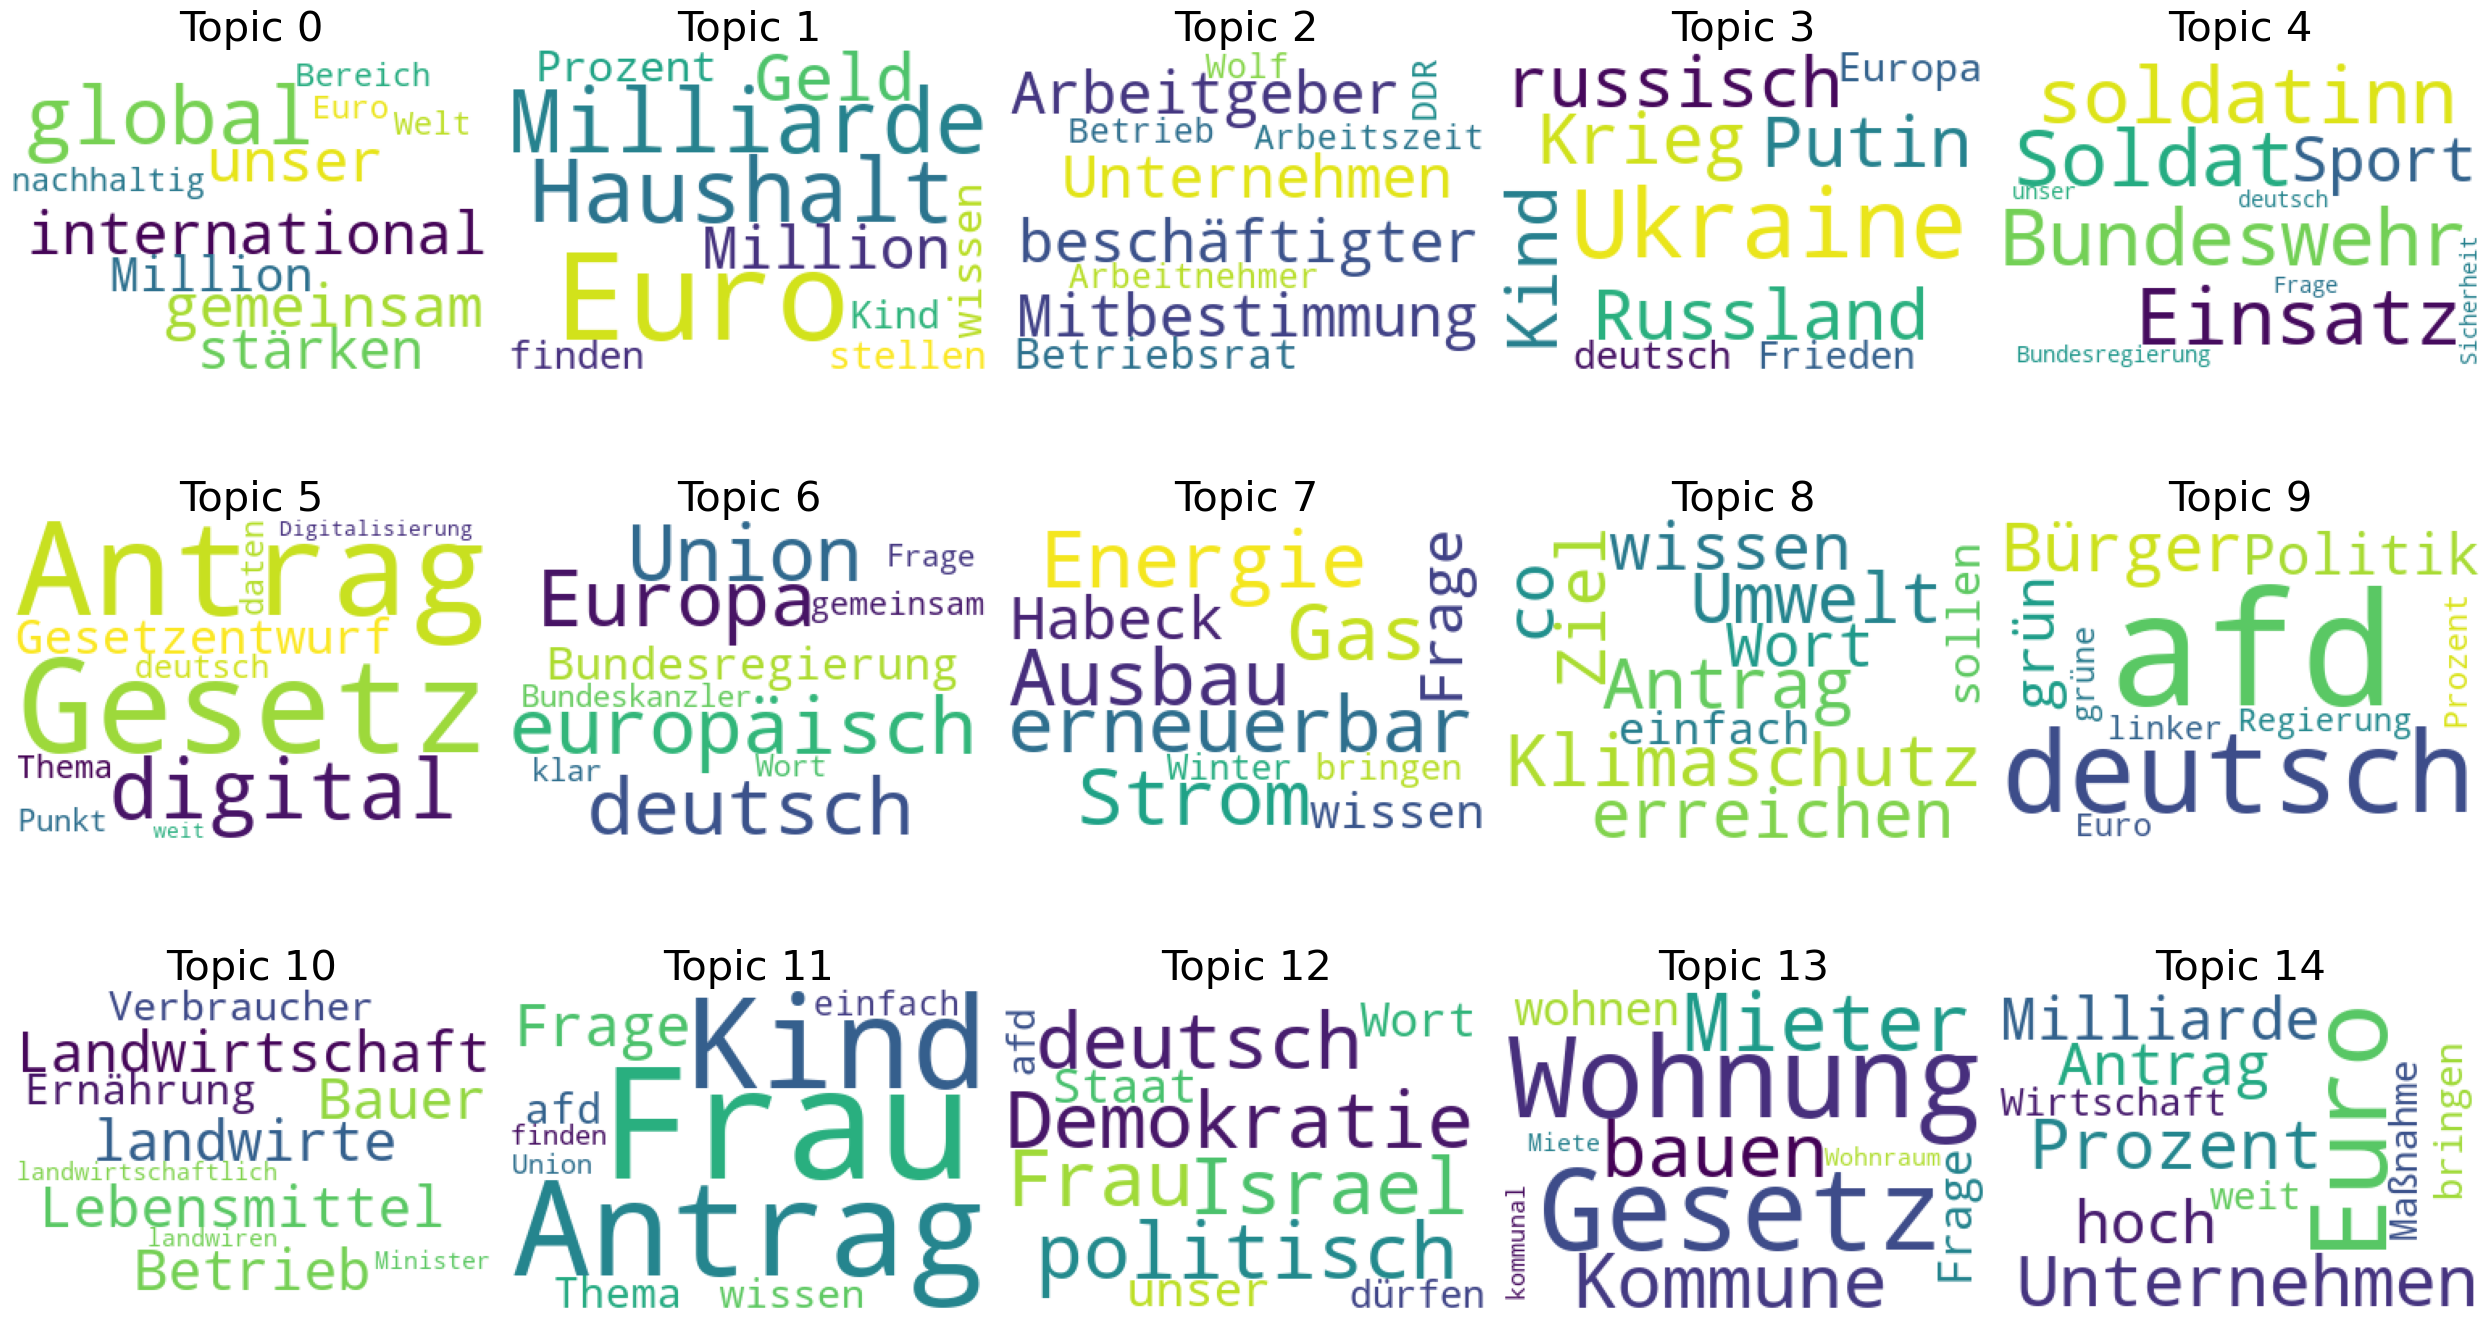


Visualization 2: Party Topic Heatmap


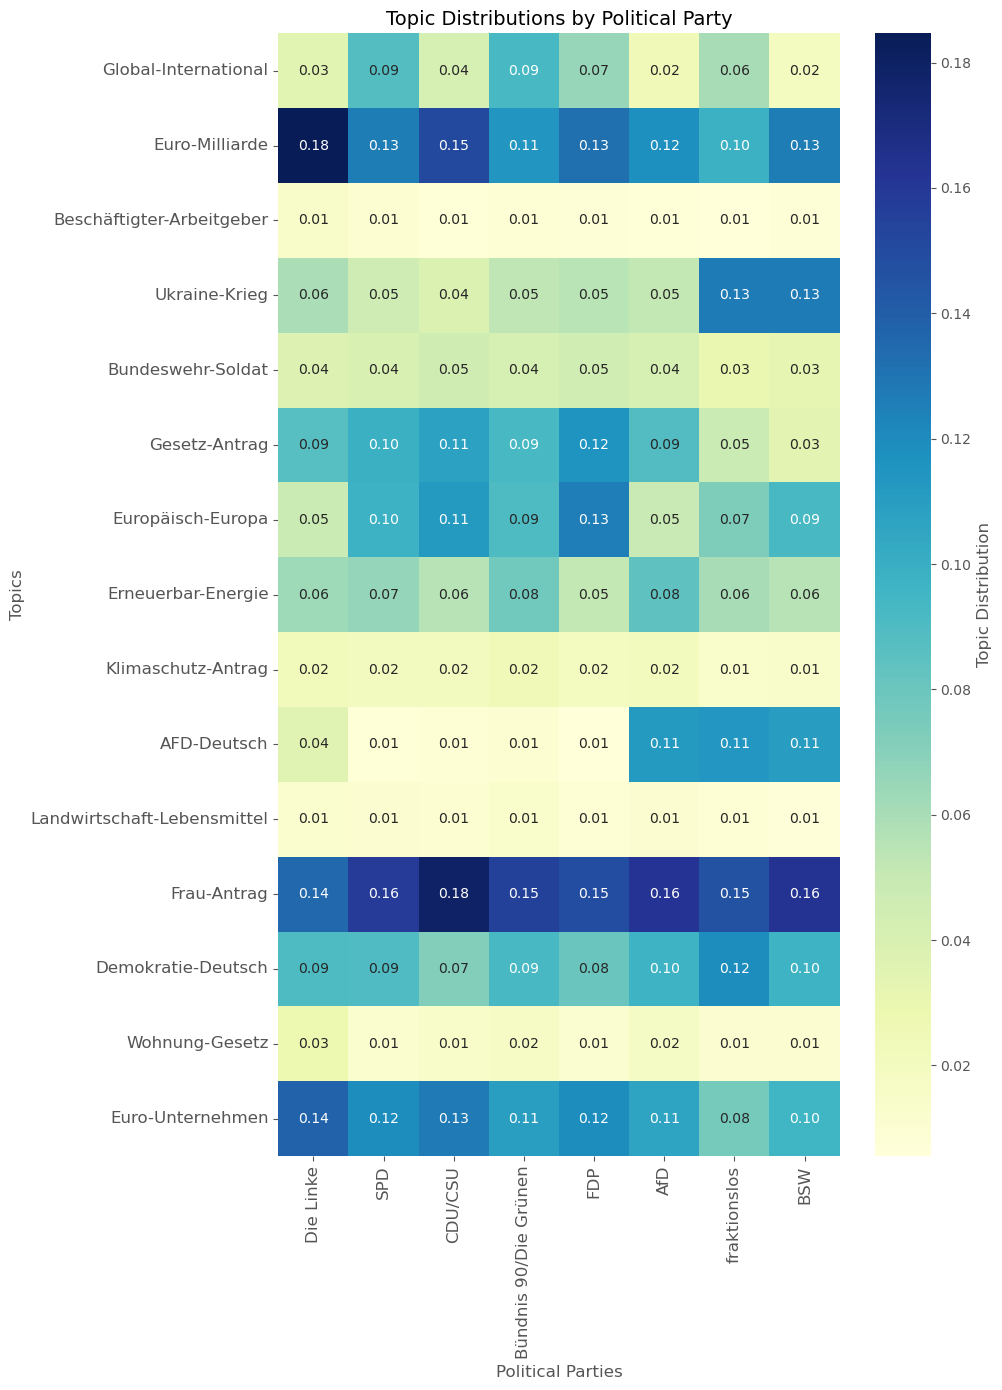


Visualization 3: Top Topics for Each Party


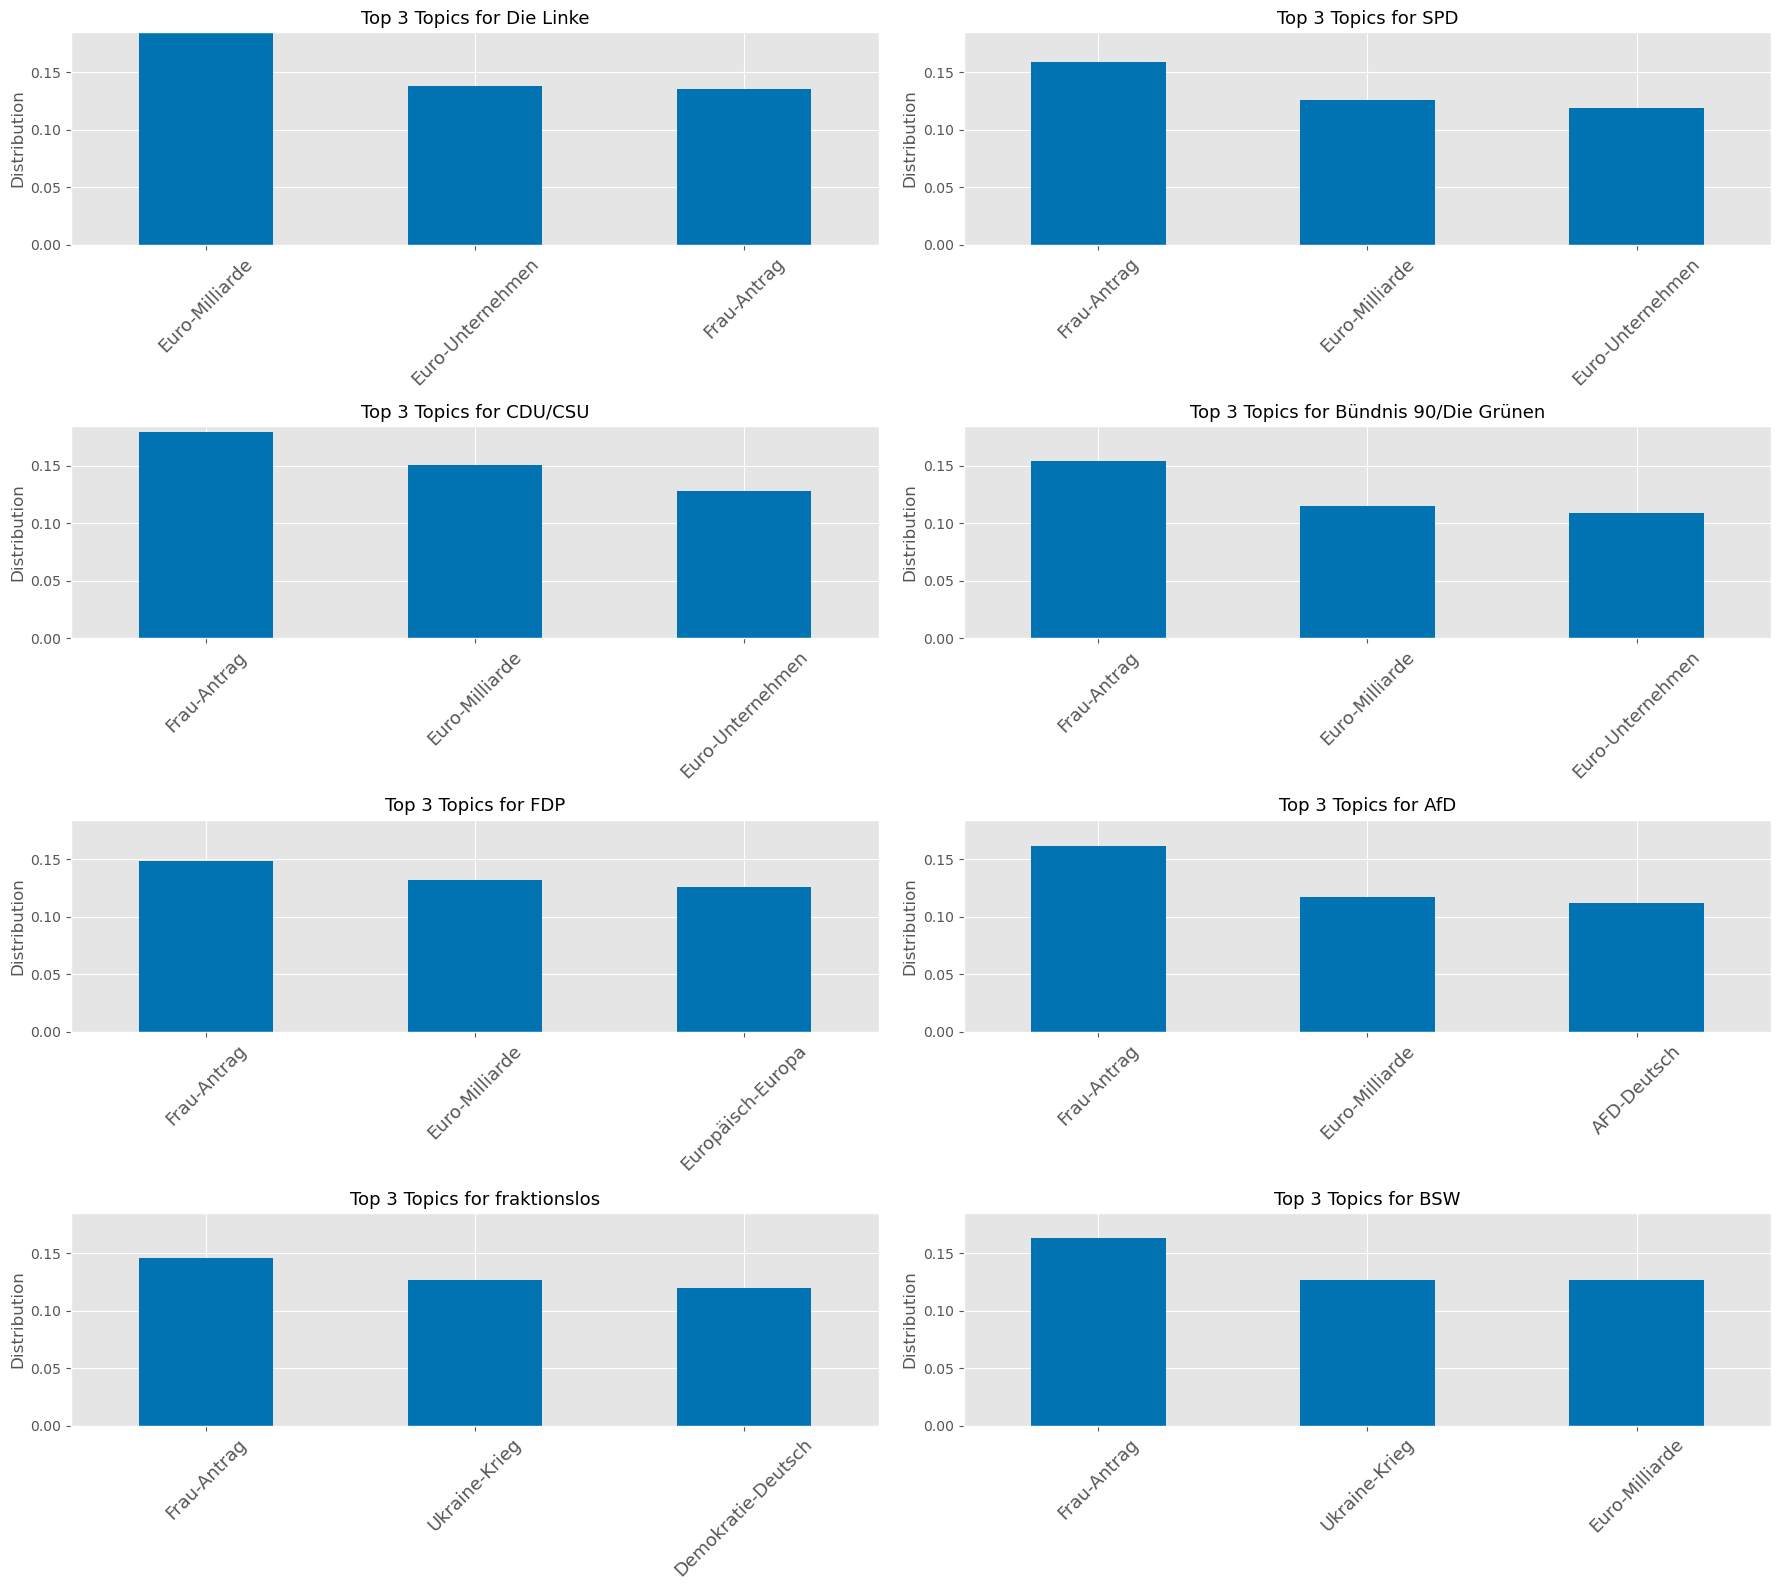

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import pickle


file_path = "results/lda_per_party_results_15" 
with open(file_path, "rb") as file:
    data = pickle.load(file)

# extract the needed components from the data structure
topic_words = data[0]['All Parties']
party_distributions = {k: v for k, v in data[0].items() if k != 'All Parties'}
processed_text_df = data[3] 



# visualization style
plt.style.use('ggplot')
sns.set_palette("colorblind")

# Visualization 1: Topic Word Clouds
def create_topic_wordclouds(topic_words):

    num_topics = len(topic_words)
    
    # determine the number of columns and rows based on the number of topics
    cols = 5 
    rows = (num_topics // cols) + (1 if num_topics % cols != 0 else 0)
    
    # adjust the figure size dynamically based on the number of topics
    figsize_width = cols * 5
    figsize_height = rows * 5
    
    plt.figure(figsize=(figsize_width, figsize_height))
    
    for i, (topic_num, word_dist) in enumerate(topic_words):
        plt.subplot(rows, cols, i+1)
        wordcloud = WordCloud(width=300, height=200, 
                             background_color='white').generate_from_text(word_dist)
        plt.imshow(wordcloud)
        plt.title(f'Topic {topic_num}', fontsize=30)
        plt.axis('off')
    
    plt.tight_layout(pad=1.0) 
    plt.show()

# topic dictionary for label replacement
topic_dict = {
    "Topic_0": "Global-International",
    "Topic_1": "Euro-Milliarde",
    "Topic_2": "Beschäftigter-Arbeitgeber",
    "Topic_3": "Ukraine-Krieg",
    "Topic_4": "Bundeswehr-Soldat",
    "Topic_5": "Gesetz-Antrag",
    "Topic_6": "Europäisch-Europa",
    "Topic_7": "Erneuerbar-Energie",
    "Topic_8": "Klimaschutz-Antrag",
    "Topic_9": "AFD-Deutsch",
    "Topic_10": "Landwirtschaft-Lebensmittel",
    "Topic_11": "Frau-Antrag",
    "Topic_12": "Demokratie-Deutsch",
    "Topic_13": "Wohnung-Gesetz",
    "Topic_14": "Euro-Unternehmen"
}

# function to get topic name
def get_topic_name(topic_label):
    return topic_dict.get(topic_label, topic_label)

# Visualization 2: Heatmap
def plot_party_topic_heatmap(party_distributions):

    df = pd.DataFrame(party_distributions).T
    
    # sort columns by topic number and rename with topic names
    df = df[[f'Topic_{i}' for i in range(len(df.columns))]]
    df.columns = [get_topic_name(f"Topic_{i}") for i in range(len(df.columns))]
    
    plt.figure(figsize=(10, 14))
    ax = sns.heatmap(df.T, annot=True, fmt='.2f', cmap='YlGnBu',  #don't touch, trust me
                     cbar_kws={'label': 'Topic Distribution'})

    plt.title('Topic Distributions by Political Party', fontsize=14)
    plt.ylabel('Topics', fontsize=12)
    plt.xlabel('Political Parties', fontsize=12)

    # x-axis label alignment
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=12) 
    plt.yticks(rotation=0, fontsize= 12)
    plt.tight_layout()
    plt.show()

# Visualization 3: Top n topics for each party bar plots
def plot_top_party_topics(party_distributions, n_topics=3):

    df = pd.DataFrame(party_distributions).T
    
    # get top n topics for each party
    top_topics = {}
    max_value = 0  
    for party in df.index:
        top = df.loc[party].nlargest(n_topics)
        top.index = [get_topic_name(topic) for topic in top.index]  
        top_topics[party] = top
        max_value = max(max_value, top.max())  # update max_value for y-axis scaling
    
    
    n_parties = len(top_topics)
    cols = 2
    rows = (n_parties // cols) + (n_parties % cols > 0)  # ensure enough rows
    
    plt.figure(figsize=(18, 4*rows))
    for i, (party, topics) in enumerate(top_topics.items()):
        plt.subplot(rows, cols, i+1)
        topics.plot(kind='bar')
        plt.title(f'Top {n_topics} Topics for {party}', fontsize=13)
        plt.ylabel('Distribution')
        plt.xticks(rotation=45, fontsize=13)
        plt.ylim(0, max_value)
    
    plt.tight_layout()
    plt.show()

# Call the visualization functions
print("Visualization 1: Topic Word Clouds")
create_topic_wordclouds(topic_words)

print("\nVisualization 2: Party Topic Heatmap")
plot_party_topic_heatmap(party_distributions)

print("\nVisualization 3: Top Topics for Each Party")
plot_top_party_topics(party_distributions, n_topics=3)

<Figure size 1200x600 with 0 Axes>

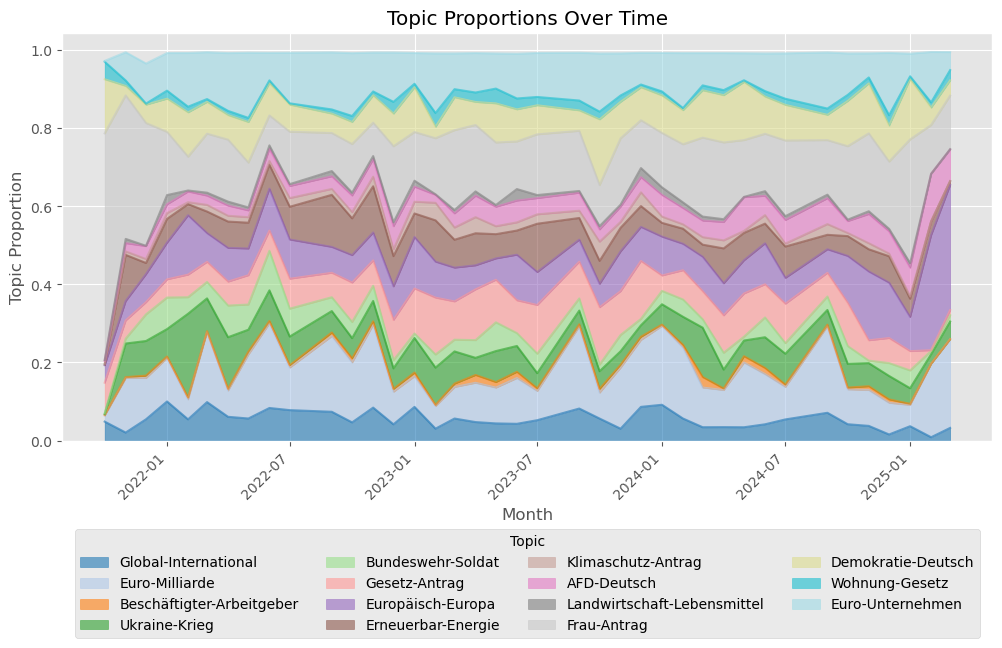

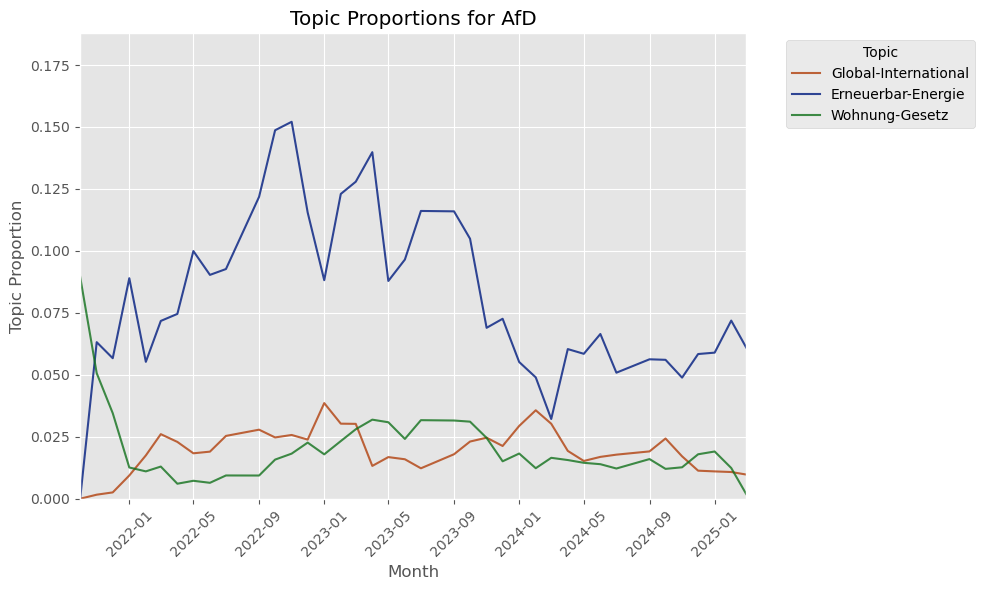

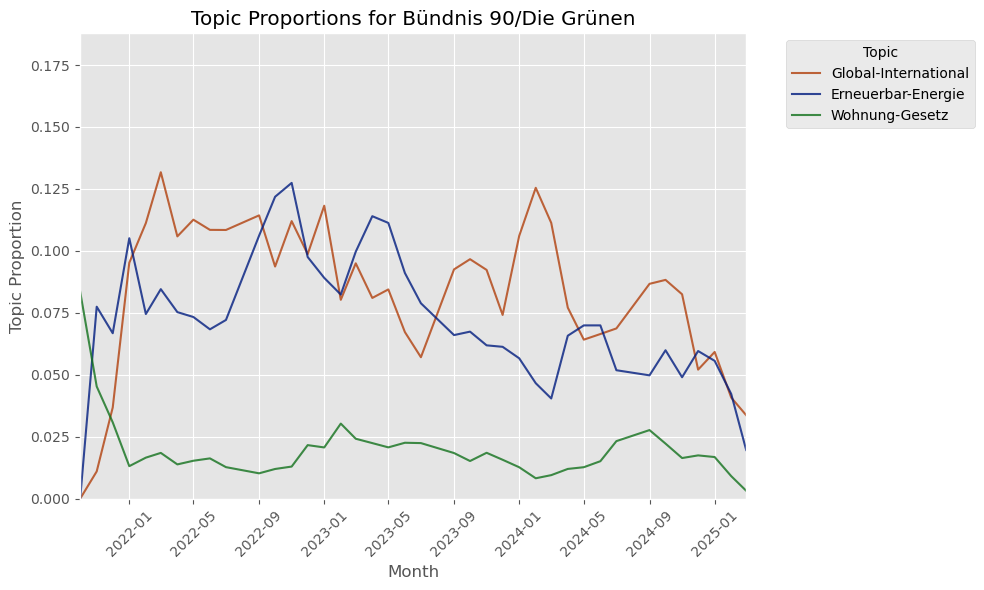

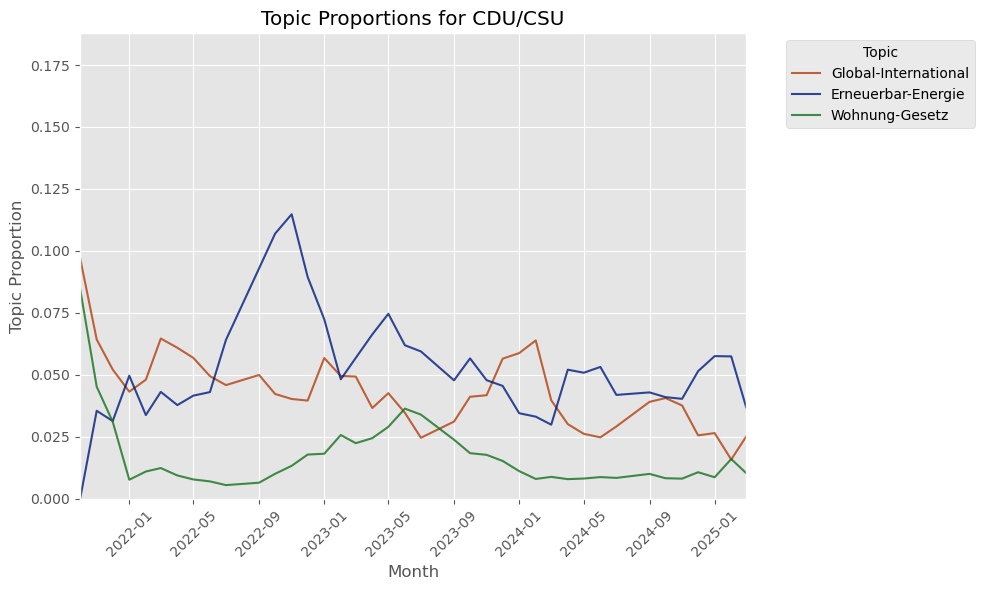

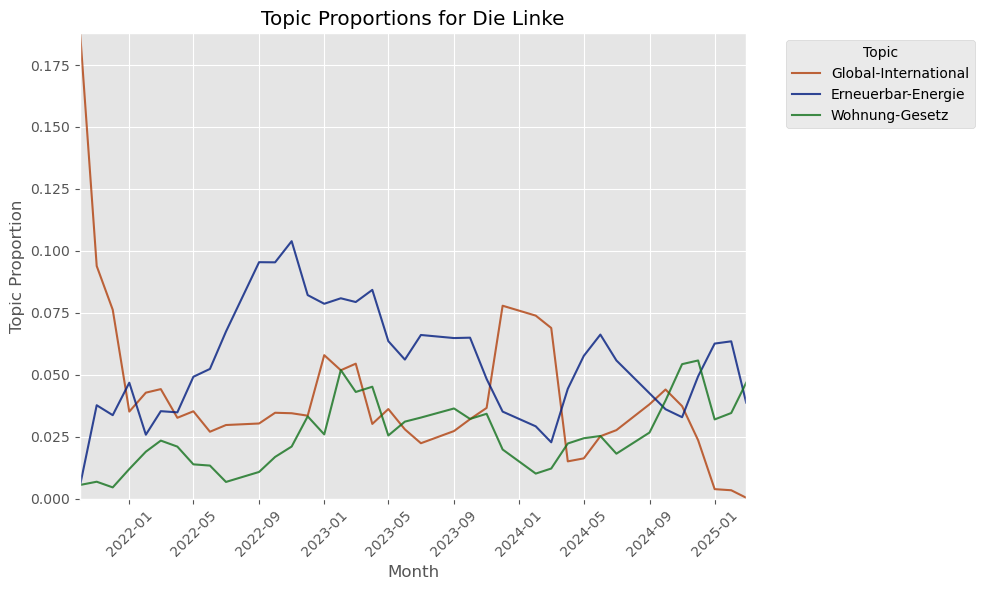

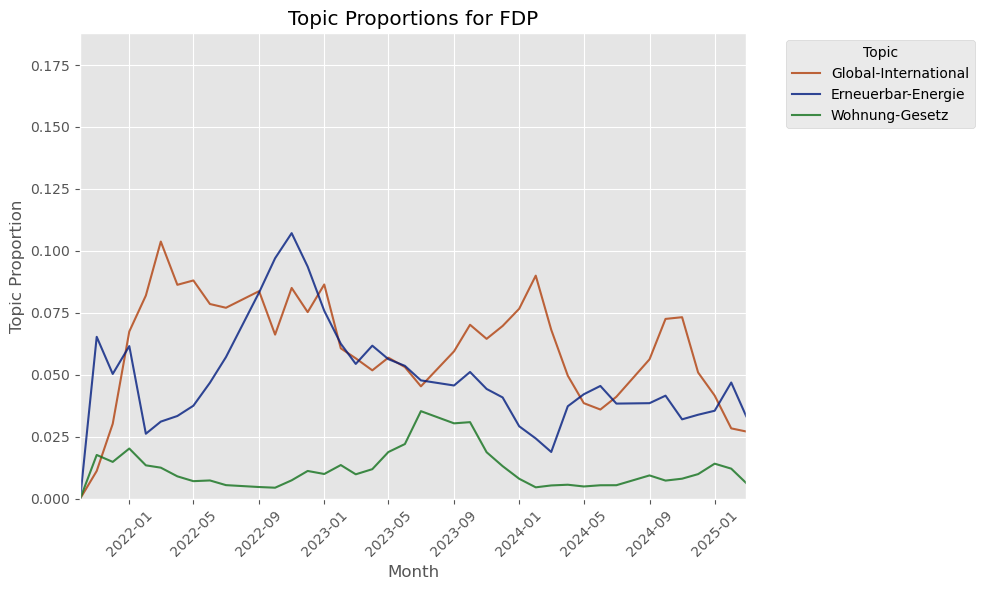

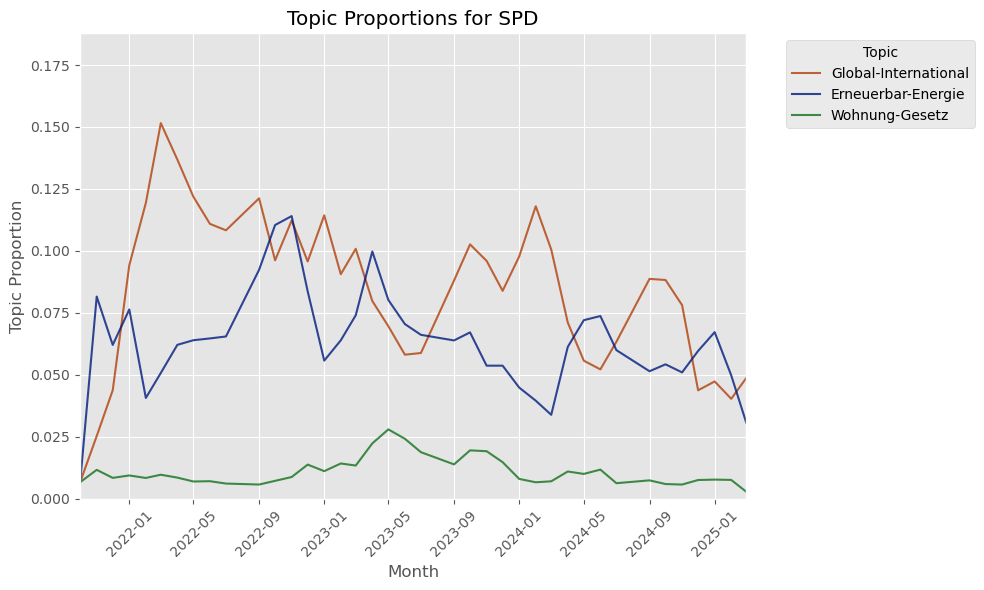

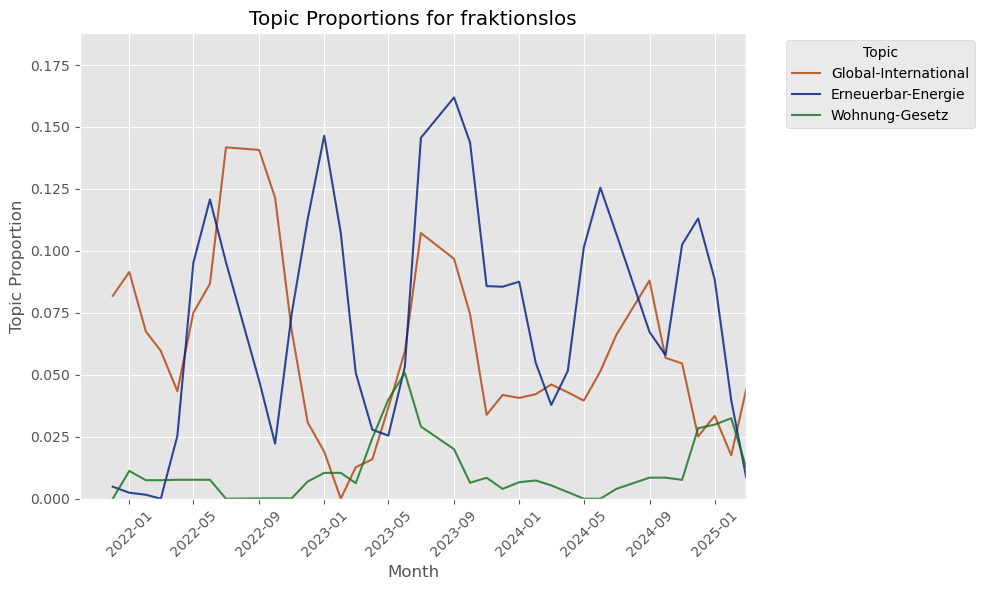

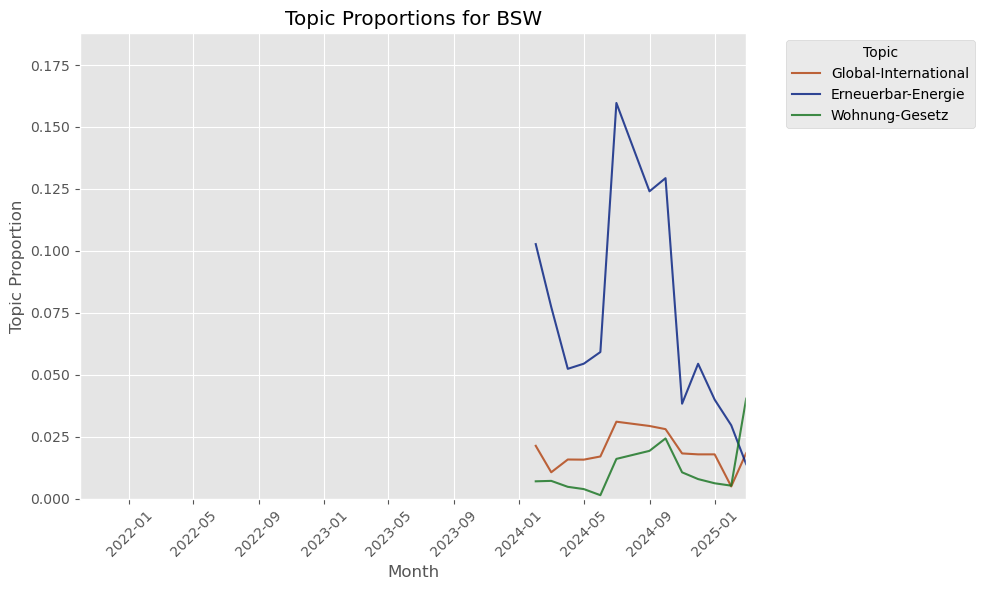

In [74]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "results/monthly_lda_per_party_results_15"  
with open(file_path, "rb") as f:
    data = pickle.load(f)

# extract components
topic_dict = data[0]  
lda_model = data[1] 
dictionary = data[2] 
df = data[3]  

# topic name mapping
topic_names = {
    0: "Global-International",
    1: "Euro-Milliarde",
    2: "Beschäftigter-Arbeitgeber",
    3: "Ukraine-Krieg",
    4: "Bundeswehr-Soldat",
    5: "Gesetz-Antrag",
    6: "Europäisch-Europa",
    7: "Erneuerbar-Energie",
    8: "Klimaschutz-Antrag",
    9: "AFD-Deutsch",
    10: "Landwirtschaft-Lebensmittel",
    11: "Frau-Antrag",
    12: "Demokratie-Deutsch",
    13: "Wohnung-Gesetz",
    14: "Euro-Unternehmen"
}

# convert topic_dict to DataFrame
topic_data = []
for date, topic_info in topic_dict.items():
    if date == "Full Model:":
        continue  
    if isinstance(topic_info, dict):  
        for party, topic_dist in topic_info.items():
            if party == "All Parties":
                continue  
            for topic_label, weight in topic_dist.items():
                topic_id = int(topic_label.split("_")[1])  
                topic_data.append({"date": date, "party": party, "topic_id": topic_id, "weight": weight})

# convert to DataFrame
topic_df = pd.DataFrame(topic_data)

# convert date column to datetime
topic_df["date"] = pd.to_datetime(topic_df["date"])

# aggregate topic proportions by month
topic_df["month"] = topic_df["date"].dt.to_period("M")  
monthly_topics = topic_df.groupby(["month", "topic_id"])["weight"].mean().reset_index()

# pivot for stacked area plot
pivot_data = monthly_topics.pivot(index="month", columns="topic_id", values="weight").fillna(0)

# convert topic IDs to names in column headers
pivot_data.columns = [topic_names.get(topic_id, f"Topic_{topic_id}") for topic_id in pivot_data.columns]

# convert index from period to timestamp for plotting
pivot_data.index = pivot_data.index.to_timestamp()

# plot stacked area chart 
plt.figure(figsize=(12, 6))
pivot_data.plot.area(alpha=0.6, colormap="tab20", figsize=(12, 6)) #12,6
plt.title("Topic Proportions Over Time")
plt.xlabel("Month")
plt.ylabel("Topic Proportion")
plt.legend(title="Topic", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=4) #1.05,1
plt.xticks(rotation=45) 
plt.show()

# aggregate topic proportions by party
party_topics = topic_df.groupby(["month", "party", "topic_id"])["weight"].mean().reset_index()

# convert month index for plotting
party_topics["month"] = pd.to_datetime(party_topics["month"].astype(str))  

# define which topics to display
selected_topics = [0, 7, 13]  # choose which topics to display, set to None to show all

# filter topics if specific topics are selected
if selected_topics:
    party_topics = party_topics[party_topics["topic_id"].isin(selected_topics)]

# replace topic IDs with names
party_topics["topic_name"] = party_topics["topic_id"].map(topic_names)

# smoothen with moving average
window_size = 3  # window-size in months
party_topics["weight_smoothed"] = party_topics.groupby(["party", "topic_name"])["weight"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# colors handling
unique_topics = sorted(party_topics["topic_name"].unique())
num_topics = len(unique_topics)
palette = sns.color_palette("dark", num_topics)

# create a color mapping for each topic
topic_colors = {topic: palette[i] for i, topic in enumerate(unique_topics)}

# calculate the global min and max values for weight_smoothed
global_min = party_topics["weight_smoothed"].min()
global_max = party_topics["weight_smoothed"].max()

# calculate the global x-axis range (min and max dates)
global_min_date = party_topics["month"].min()
global_max_date = party_topics["month"].max()

# plot individual line charts for each party 
for party in party_topics["party"].unique():
    party_data = party_topics[party_topics["party"] == party]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=party_data, x="month", y="weight_smoothed", hue="topic_name", palette=topic_colors, alpha=0.8)
    plt.title(f"Topic Proportions for {party}")
    plt.xlabel("Month")
    plt.ylabel("Topic Proportion")
    plt.xticks(rotation=45)
    plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xlim(global_min_date, global_max_date)
    plt.ylim(global_min, global_max)
    
    plt.tight_layout()
    plt.show()


In [75]:
import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from IPython.display import display

def load_data(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

data = load_data('results/lda_per_party_results_15')

# extract components
lda_model = data[1]  # The LDA model
dictionary = data[2]  # The dictionary
processed_text_df = data[3]  # DataFrame with processed text

# prepare the corpus
corpus = [text.split() for text in processed_text_df['processed_text'].dropna()]
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

# prepare visualization
vis = gensimvis.prepare(
    lda_model,
    bow_corpus,
    dictionary,
    sort_topics=False
)

# display ldavis
pyLDAvis.enable_notebook()
display(vis)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.054917  0.031882       1        1   5.951590
1      0.072516  0.035395       2        1  13.607615
2     -0.209383 -0.123813       3        1   0.826800
3      0.079532 -0.119393       4        1   5.252179
4      0.060590 -0.014096       5        1   4.010492
5      0.041090  0.049676       6        1   9.592961
6      0.090514 -0.002757       7        1   9.972425
7      0.044474  0.084788       8        1   6.904855
8     -0.071079  0.101131       9        1   1.940555
9     -0.041563 -0.104331      10        1   2.788021
10    -0.246464  0.050853      11        1   1.015689
11     0.085502 -0.003768      12        1  15.556045
12     0.092117 -0.105485      13        1   9.173954
13    -0.093953  0.036772      14        1   1.385355
14     0.041190  0.083146      15        1  12.021464, topic_info=             Term          Freq         Total Category  logprob  loglift
1945         Euro  16938.000000  16938.000000  Default  30.0000  30.0000
513        Gesetz   9113.000000   9113.000000  Default  29.0000  29.0000
170           afd   8222.000000   8222.000000  Default  28.0000  28.0000
692   Unternehmen   7291.000000   7291.000000  Default  27.0000  27.0000
1176   europäisch   8944.000000   8944.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
62        deutsch   1377.039587  15345.378549  Topic15  -5.9890  -0.2924
103        wissen   1335.086142  12337.608793  Topic15  -6.0200  -0.1052
1023        Union   1335.318852  12458.312546  Topic15  -6.0198  -0.1147
682       Problem   1258.779751   7904.376058  Topic15  -6.0788   0.2812
72          genau   1265.687748  11220.697738  Topic15  -6.0733  -0.0637

[1316 rows x 6 columns], token_table=        Topic      Freq               Term
term                                      
13604       6  0.008712             Abfall
13604       8  0.156820             Abfall
13604       9  0.818949             Abfall
104580      9  0.941548  Abfalleigenschaft
5008        1  0.069569       Abhängigkeit
...       ...       ...                ...
15570       2  0.005617            özdemir
15570       7  0.022469            özdemir
15570      11  0.848208            özdemir
15570      12  0.078642            özdemir
15570      13  0.033704            özdemir

[5851 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

C:\Users\juliu\AppData\Local\Temp\ipykernel_13452\865445687.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Keyword_Frequency"] = df["processed_text"].apply(lambda x: custom_frequency_analysis(x, keywords))


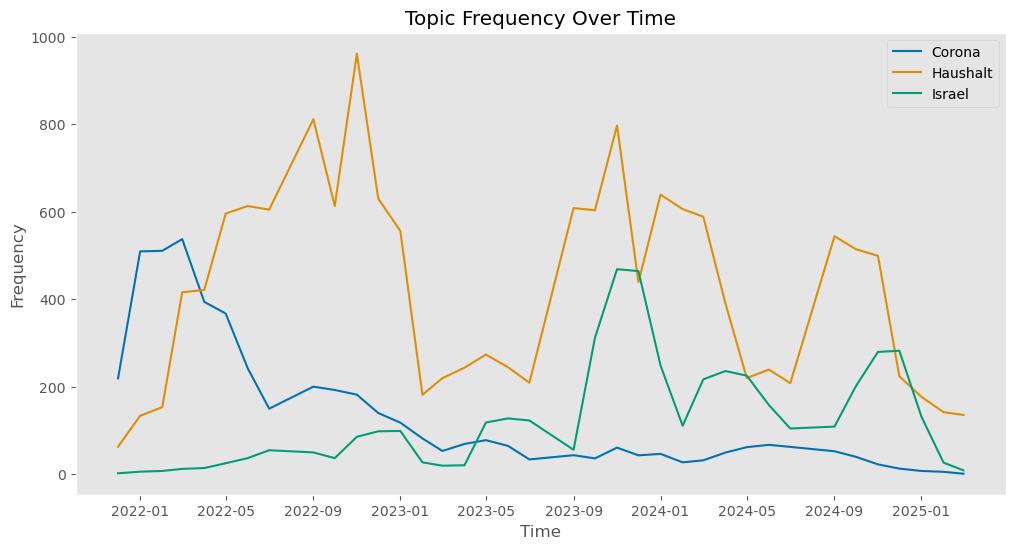

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from collections import Counter
import re

file_path = "results/monthly_lda_per_party_results_15"  
with open(file_path, "rb") as f:
    data = pickle.load(f)

df = data[3]

# predefined dictionary of keywords
keywords = {
    "Corona": ["impfpflicht", "corona", "impfung", "virus", "pandemie", "masken", "maskenpflicht", "impfen", "impfstoff"],
    "Haushalt": ["haushalt", "geld", "schuldenbremse", "sondervermögen"],
    "Israel": ["israel", "gaza", "palästina", "jude", "jüdisch", "antisemitismus"]
}


def custom_frequency_analysis(text, keywords):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)
    word_counts = Counter(words)
    results = {key: sum(word_counts[word] for word in words_list if word in word_counts)
               for key, words_list in keywords.items()}
    return results

df = df.dropna()
df["Keyword_Frequency"] = df["processed_text"].apply(lambda x: custom_frequency_analysis(x, keywords))

# expand dictionary into separate columns
keyword_df = df["Keyword_Frequency"].apply(pd.Series)
df = pd.concat([df, keyword_df], axis=1).drop(columns=["Keyword_Frequency"])

# group by year and month, summing the frequencies
party_analysis = df.groupby(["year", "month"]).sum().reset_index()

# create a time column for plotting
party_analysis["Time"] = pd.to_datetime(party_analysis["year"].astype(str) + "-" + party_analysis["month"].astype(str))

# set the moving average window size
window_size = 3  

# plotting
plt.figure(figsize=(12, 6))
for topic in ["Corona", "Haushalt", "Israel"]:
    #plt.plot(party_analysis["Time"], party_analysis[topic], label=topic, alpha=0.6)
    plt.plot(party_analysis["Time"], party_analysis[topic].rolling(window=window_size).mean(), label=topic)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Topic Frequency Over Time")
plt.legend()
plt.grid()
plt.show()
